In [1]:
# import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import roc_auc_score,average_precision_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE


from collections import Counter
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data

df = pd.read_csv("creditcard.csv")

In [3]:
print("The shape of the dataframe is: {}".format(df.shape))

The shape of the dataframe is: (284807, 31)


In [4]:
# first few entries of the dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# null values present in the dataset (if any)

df.isnull().sum().any()

False

In [7]:
# unique values in each feature

#df.nunique()

In [8]:
#df['Time'].value_counts(normalize=True)

In [8]:
anno_feats = list(df.columns)[1:29]

for feat in anno_feats:
    print("Feature: {}, Min: {}, Max: {}".format(feat,df[feat].min(),df[feat].max()))

Feature: V1, Min: -56.407509631329, Max: 2.45492999121121
Feature: V2, Min: -72.7157275629303, Max: 22.0577289904909
Feature: V3, Min: -48.3255893623954, Max: 9.38255843282114
Feature: V4, Min: -5.68317119816995, Max: 16.8753440335975
Feature: V5, Min: -113.743306711146, Max: 34.8016658766686
Feature: V6, Min: -26.1605059358433, Max: 73.3016255459646
Feature: V7, Min: -43.5572415712451, Max: 120.589493945238
Feature: V8, Min: -73.2167184552674, Max: 20.0072083651213
Feature: V9, Min: -13.4340663182301, Max: 15.5949946071278
Feature: V10, Min: -24.5882624372475, Max: 23.7451361206545
Feature: V11, Min: -4.79747346479757, Max: 12.0189131816199
Feature: V12, Min: -18.6837146333443, Max: 7.8483920756446
Feature: V13, Min: -5.79188120632084, Max: 7.12688295859376
Feature: V14, Min: -19.2143254902614, Max: 10.5267660517847
Feature: V15, Min: -4.49894467676621, Max: 8.87774159774277
Feature: V16, Min: -14.1298545174931, Max: 17.3151115176278
Feature: V17, Min: -25.1627993693248, Max: 9.253526

In [9]:
print("Feature: {}, Min: {}, Max: {}".format('Time',df['Time'].min(),df['Time'].max()))
print("Feature: {}, Min: {}, Max: {}".format('Amount',df['Amount'].min(),df['Amount'].max()))

Feature: Time, Min: 0.0, Max: 172792.0
Feature: Amount, Min: 0.0, Max: 25691.16


In [10]:
# Class distribution in the target variable

df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

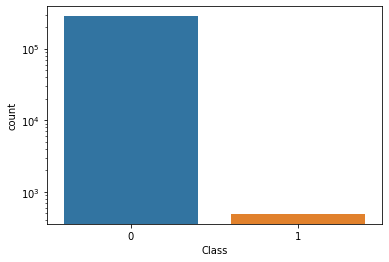

In [11]:
# visualize the class distribution

sns.countplot(df['Class'])
plt.yscale('log')

**Class 0: negative/majority class**

**Class 1: positive/minority class**

<AxesSubplot:xlabel='Class', ylabel='Amount'>

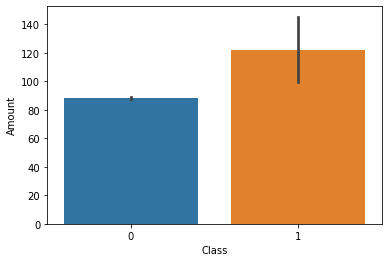

In [12]:
# Class vs Amount plot

sns.barplot('Class','Amount',data=df)

<AxesSubplot:xlabel='Class', ylabel='Time'>

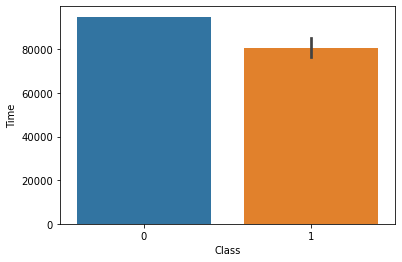

In [13]:
# Class vs Time plot

sns.barplot('Class','Time',data=df)

In [14]:
# feature matrix
X = df.drop('Class',axis=1)

# target vector
y = df[['Class']]

In [15]:
# split into train and test datasets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=11,stratify=y)

In [16]:
print("The shape of the training dataset: {}".format(X_train.shape))
print("The shape of the test dataset: {}".format(X_test.shape))

The shape of the training dataset: (256326, 30)
The shape of the test dataset: (28481, 30)


In [17]:
# class distribution in the splitted datasets

print("Train Set")
print(y_train.value_counts(normalize=True))
print(" ")
print("Test Set")
print(y_test.value_counts(normalize=True))

Train Set
Class
0        0.998272
1        0.001728
dtype: float64
 
Test Set
Class
0        0.99828
1        0.00172
dtype: float64


In [18]:
def build_pipeline(X_train,y_train):
    
    """
    A fuction to build a pipeline and fit the pipeline to the data.
    
    Parameters
    ------------
    steps: list
        a list containing all the steps of the pipeline
        
    X_train: pandas dataframe
        the input feature matrix (training)
        
    y_train: pandas dataframe
        the target vector (training)

    Returns
    ---------
    pipeline: scikit-learn pipeline object
        the pipeline fitted to the input data
    
    """
    
    # build the pipeline with two steps -> 1. standard scaling all the features, 2. the classifier and fit it to the
    # training dataset

    steps = [('scaler',StandardScaler()),
             ('clf',LogisticRegression(random_state=12))]
    
    pipeline = Pipeline(steps=steps)
        
    # fit the pipeline to the training dataset
    pipeline.fit(X_train,y_train)
    
    return pipeline

def eval_model(pipeline,X_train,X_test,y_train,y_test):
    
    """
    A function to evaluate a classifier and visualize its performance.
    
    Parameters
    ------------
    pipeline: scikit-learn pipeline object
        the pipeline fitted to the input data
        
    X_train: pandas dataframe
        the input feature matrix (training)
        
    X_test: pandas dataframe
        the input feature matrix (testing)   
        
    y_train: pandas dataframe
        the target vector (training)  
        
    y_test: pandas dataframe
        the target vector (testing)      
        
    Returns
    ---------
    None
    
    """
    
    # predict on the train set
    pred_train = pipeline.predict(X_train)

    # compute different metrics
    clf_report_train = classification_report(y_train,pred_train)

    # compute TP,TN,FP,FN
    conf_mat_train = confusion_matrix(y_train,pred_train)
    
    # predict on the train set
    pred_test = pipeline.predict(X_test)

    # compute different metrics
    clf_report_test = classification_report(y_test,pred_test)

    # compute TP,TN,FP,FN
    conf_mat_test = confusion_matrix(y_test,pred_test)
    
    print("The train set:")
    print(clf_report_train)
    print("\n")
    print(conf_mat_train)
    print("\n")
    
    print("The test set:")
    print(clf_report_test)
    print("\n")
    print(conf_mat_test)
    
    # plot the confusion matrix

    f, ax = plt.subplots(1,2,sharey='row',figsize=(10,8))

    plot_confusion_matrix(pipeline,X_train,y_train,cmap=plt.cm.Blues,ax=ax[0],colorbar=False)
    plot_confusion_matrix(pipeline,X_test,y_test,cmap=plt.cm.Blues,ax=ax[1])

    plt.show()
    
    
def compute_loss_roc_pr_auc(pipeline,X_test,y_test):
    
    """
    A function to compute and plot ROC and PR AUC.
    
    Parameters
    ------------
    pipeline: scikit-learn pipeline object
        the pipeline fitted to the input data

    X_test: pandas dataframe
        the input feature matrix (testing)   

    y_test: pandas dataframe
        the target vector (testing)      
        
    Returns
    ---------
    None
    
    """
    
    # compute predicted probabilities
    pred_test_prob = pipeline.predict_proba(X_test)

    # compute the ROC AUC score
    roc_score = roc_auc_score(y_test,pred_test_prob[:,1])

    # compute the PR AUC score
    pr_score = average_precision_score(y_test,pred_test_prob[:,1])
    
    # compute the loss function
    loss_score = log_loss(y_test,pred_test_prob[:,1])

    print("ROC AUC score for the test set: {}".format(roc_score))
    print("PR AUC score for the test set: {}".format(pr_score))
    print("Log loss score for the test set: {}".format(loss_score))

    
    f, ax = plt.subplots(1,2,sharey='row',figsize=(12,10))

    plot_roc_curve(pipeline,X_test,y_test,ax=ax[0])
    plot_precision_recall_curve(pipeline,X_test,y_test,ax=ax[1])
    plt.show()

## No data resampling

The train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.88      0.63      0.73       443

    accuracy                           1.00    256326
   macro avg       0.94      0.81      0.87    256326
weighted avg       1.00      1.00      1.00    256326



[[255845     38]
 [   166    277]]


The test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.86      0.65      0.74        49

    accuracy                           1.00     28481
   macro avg       0.93      0.83      0.87     28481
weighted avg       1.00      1.00      1.00     28481



[[28427     5]
 [   17    32]]


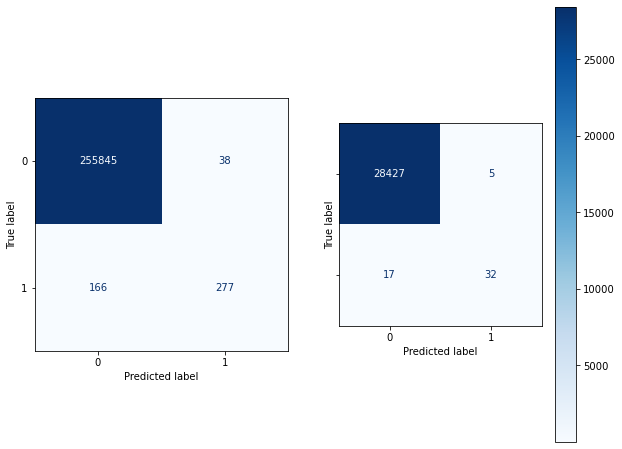

ROC AUC score for the test set: 0.9878700917620847
PR AUC score for the test set: 0.8110241195315762
Log loss score for the test set: 0.0036722440534783466


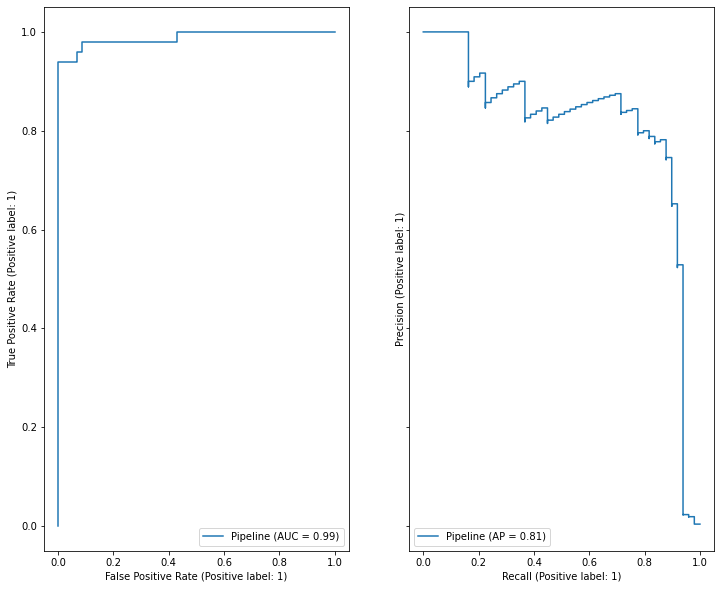

In [20]:
pipeline = build_pipeline(X_train=X_train,y_train=y_train)

# evaluate the performance of the model

eval_model(pipeline,X_train, X_test, y_train, y_test)

# ROC and PR plots and AUC scores

compute_loss_roc_pr_auc(pipeline,X_test,y_test)

## Class Resampling

In [29]:
# random over sampling the minority class

print("Class distribution before oversampling the minority class:\n {}\n".format(Counter(y_train['Class'].values)))

# strategy -> 'minority'
oversampler = RandomOverSampler(sampling_strategy='minority',random_state=22)
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train['Class'].values)
print("Class distribution after oversampling the minority class:\n {}\n".format(Counter(y_train_over)))

# strategy -> 0.1
oversampler = RandomOverSampler(sampling_strategy=0.1,random_state=22)
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train['Class'].values)
print("Class distribution after oversampling the minority class:\n {}\n".format(Counter(y_train_over)))

Class distribution before oversampling the minority class:
 Counter({0: 255883, 1: 443})

Class distribution after oversampling the minority class:
 Counter({0: 255883, 1: 255883})

Class distribution after oversampling the minority class:
 Counter({0: 255883, 1: 25588})



In [22]:
# random under sampling the majority class

# strategy -> 'majority'
undersampler = RandomUnderSampler(sampling_strategy='majority',random_state=22)
X_train_under, y_train_under = undersampler.fit_resample(X_train_over,y_train_over)
print("Class distribution after undersampling the majority class:\n {}\n".format(Counter(y_train_under)))

# strategy -> 0.6
undersampler = RandomUnderSampler(sampling_strategy=0.6,random_state=22)
X_train_under, y_train_under = undersampler.fit_resample(X_train_over,y_train_over)
print("Class distribution after undersampling the majority class:\n {}".format(Counter(y_train_under)))

Class distribution after undersampling the majority class:
 Counter({0: 25588, 1: 25588})

Class distribution after undersampling the majority class:
 Counter({0: 42646, 1: 25588})


### 1. Oversampling the minority class & undersampling the majority class

The train set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    255883
           1       0.11      0.91      0.20       443

    accuracy                           0.99    256326
   macro avg       0.56      0.95      0.60    256326
weighted avg       1.00      0.99      0.99    256326



[[252659   3224]
 [    40    403]]


The test set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28432
           1       0.11      0.94      0.20        49

    accuracy                           0.99     28481
   macro avg       0.56      0.96      0.60     28481
weighted avg       1.00      0.99      0.99     28481



[[28062   370]
 [    3    46]]


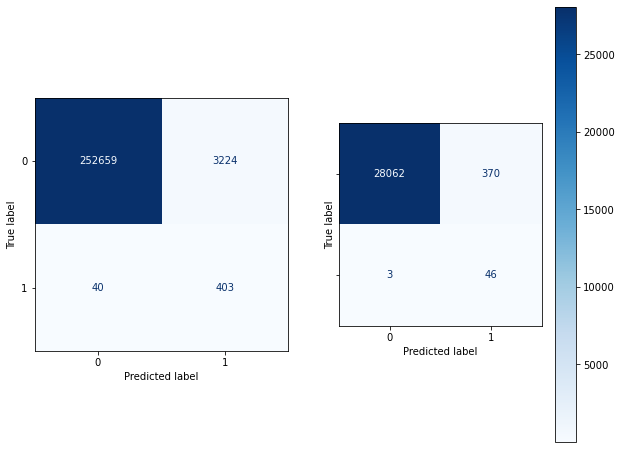

ROC AUC score for the test set: 0.9841354380806908
PR AUC score for the test set: 0.7373726866511373
Log loss score for the test set: 0.07686714470512519


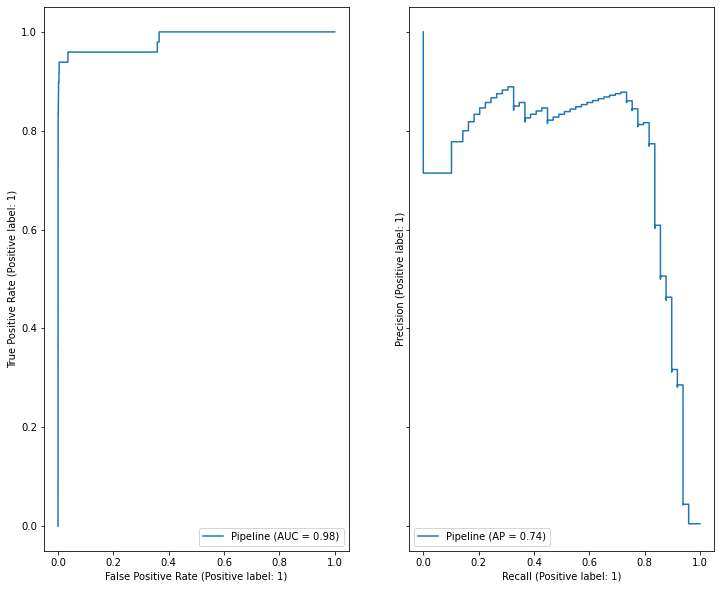

In [24]:
# define the sampling strategy

oversampler = RandomOverSampler(sampling_strategy=0.1,random_state=22)
undersampler = RandomUnderSampler(sampling_strategy=0.6,random_state=22)

# fit the oversampler to the training set and resample it
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train['Class'].values)

# fit the undersampler to the training set and resample it
X_train_final, y_train_final = undersampler.fit_resample(X_train_over,y_train_over)

# build the pipeline and fit it to the training set

pipeline = build_pipeline(X_train=X_train_final,y_train=y_train_final)

# evaluate the performance of the model

eval_model(pipeline,X_train, X_test, y_train, y_test)

# ROC and PR plots and AUC scores

compute_loss_roc_pr_auc(pipeline,X_test,y_test)

### 3. Oversampling the minority class using SMOTE technique

The train set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    255883
           1       0.14      0.90      0.24       443

    accuracy                           0.99    256326
   macro avg       0.57      0.94      0.62    256326
weighted avg       1.00      0.99      0.99    256326



[[253465   2418]
 [    46    397]]


The test set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.15      0.94      0.26        49

    accuracy                           0.99     28481
   macro avg       0.57      0.96      0.63     28481
weighted avg       1.00      0.99      0.99     28481



[[28169   263]
 [    3    46]]


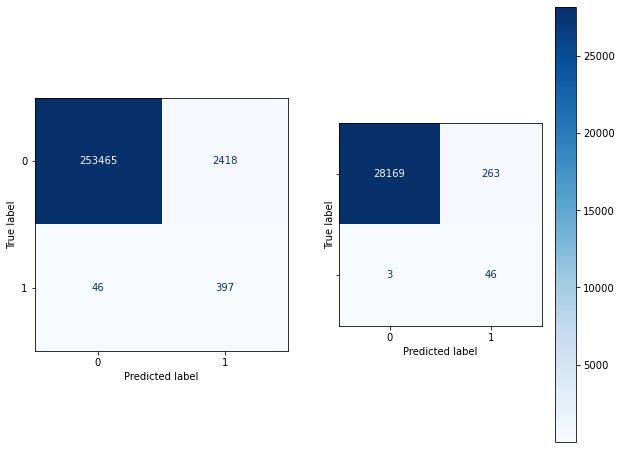

ROC AUC score for the test set: 0.9942799432659951
PR AUC score for the test set: 0.7527796187642452
Log loss score for the test set: 0.05270095031689522


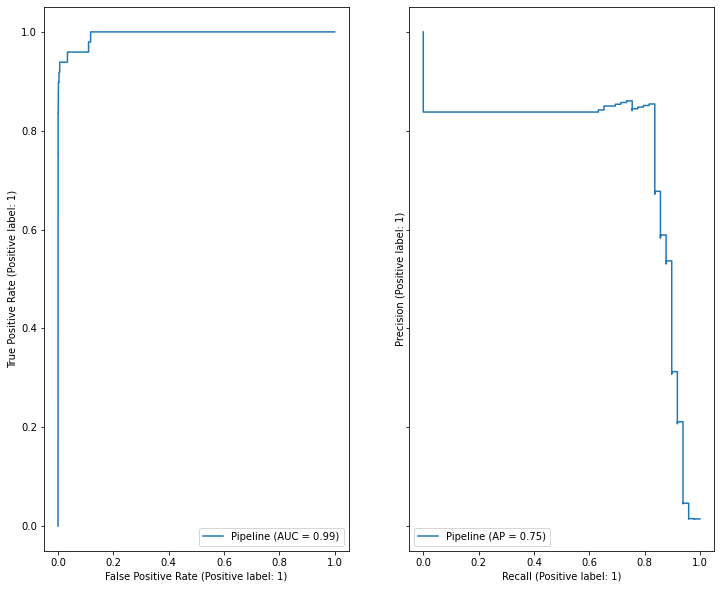

In [26]:
# define the sampling strategy

oversampler = SMOTE(random_state=22)

# fit the oversampler to the training set and resample it
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train['Class'].values)

# build the pipeline and fit it to the training set

pipeline = build_pipeline(X_train=X_train_over,y_train=y_train_over)

# evaluate the performance of the model

eval_model(pipeline,X_train, X_test, y_train, y_test)

# ROC and PR plots and AUC scores

compute_loss_roc_pr_auc(pipeline,X_test,y_test)

### 3. Combining SMOTE and undersampling 

The train set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    255883
           1       0.18      0.89      0.31       443

    accuracy                           0.99    256326
   macro avg       0.59      0.94      0.65    256326
weighted avg       1.00      0.99      1.00    256326



[[254147   1736]
 [    50    393]]


The test set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.19      0.94      0.32        49

    accuracy                           0.99     28481
   macro avg       0.60      0.97      0.66     28481
weighted avg       1.00      0.99      1.00     28481



[[28239   193]
 [    3    46]]


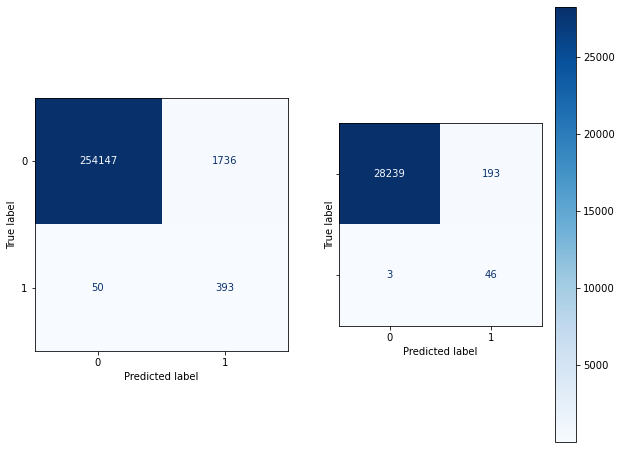

ROC AUC score for the test set: 0.9935068850275057
PR AUC score for the test set: 0.7534643569099524
Log loss score for the test set: 0.04170331722708014


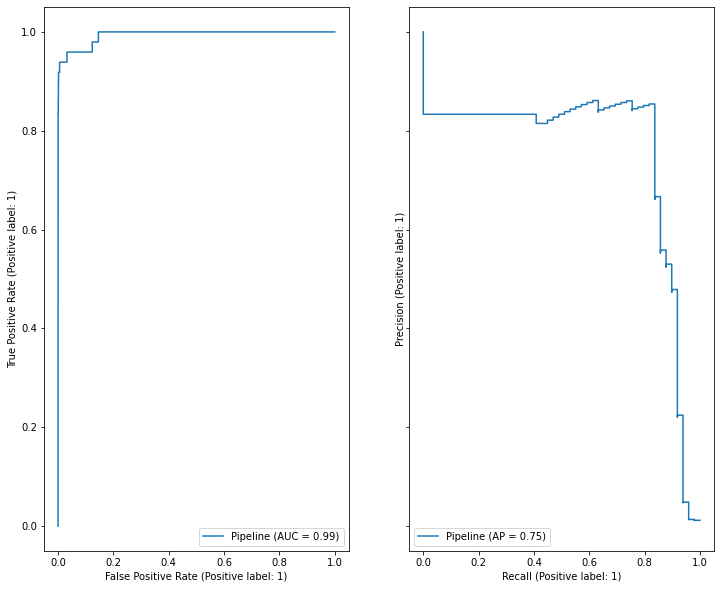

In [27]:
# define the sampling strategy

oversampler = SMOTE(sampling_strategy=0.1,random_state=22)
undersampler = RandomUnderSampler(sampling_strategy=0.6,random_state=22)

# fit the oversampler to the training set and resample it
X_train_over, y_train_over = oversampler.fit_resample(X_train,y_train['Class'].values)

# fit the undersampler to the training set and resample it
X_train_final, y_train_final = undersampler.fit_resample(X_train_over,y_train_over)

# build the pipeline and fit it to the training set

pipeline = build_pipeline(X_train=X_train_final,y_train=y_train_final)

# evaluate the performance of the model

eval_model(pipeline,X_train, X_test, y_train, y_test)

# ROC and PR plots and AUC scores

compute_loss_roc_pr_auc(pipeline,X_test,y_test)